In [1]:
import time
t0 = time.time()

In [2]:
import sys
#!{sys.executable} -m pip install --upgrade pip -i https://pypi.tuna.tsinghua.edu.cn/simple
#!{sys.executable} -m pip install --upgrade pip

In [3]:
#!{sys.executable} -m pip install -r requirements.txt -i https://pypi.tuna.tsinghua.edu.cn/simple
#!{sys.executable} -m pip install -r requirements.txt 

In [4]:
# if found error libGL.so.1: cannot open shared object file when importing cv2, run the following:
# !sudo apt-get update
# !sudo apt-get install libglu1

In [5]:
#!/usr/bin/python
import cv2 as cv
import numpy as np
import sys
import glob
import multiprocessing
import roi

In [6]:
def findInlier(img):
	# Initiate SIFT detector

	img1 = img[0]		# Image in question
	img2 = img[1][0] 	# Gold standard image
	sift = cv.SIFT_create()

	kp1, des1 = sift.detectAndCompute(img1, None)
	kp2, des2 = sift.detectAndCompute(img2, None)

	FLANN_INDEX_KDTREE = 0
	index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
	search_params = dict(checks=50)

	flann = cv.FlannBasedMatcher(index_params, search_params)

	matches = flann.knnMatch(des1, des2, k=2)

	# Store all good matches as per Lowe's ratio test.
	good = [m for m, n in matches if m.distance < 0.7*n.distance]

	if len(good) > MIN_MATCH_COUNT:
		src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
		dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

		M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 5.0)
		matchesMask = mask.ravel().tolist()

	else:
		#print "Not enough matches are found - %d/%d" % (len(good), MIN_MATCH_COUNT)
		matchesMask = []

	# Print Inliers
	return (len(matchesMask), img[1][1])


#Gets the nearest neighbor for each tile in
#a list of ROI tiles to the testData
def NN(tiles, images):
	"""param tiles: The regions of interest, in the form of images.
	param testData: Array of 30 or forty images.
	"""
	#store the max inliers for each tile
	maxInliers = []
	import matplotlib.pyplot as plt
	%matplotlib inline
	for tile in tiles:

		pairs = [(tile.copy(), img2) for img2 in images]
		if False:
			p = multiprocessing.Pool(processes = 4)
			inliers = p.map(findInlier, pairs)
		else:
			inliers = [findInlier(pair) for pair in pairs]

		theMax = max(inliers)

		#Show the tile to identify
		# cv.imshow("Tile to identify", tile)
		plt.figure(figsize=(1,1))
		plt.title('ROI')
		plt.imshow(tile)
		#cv.waitKey(1)

		#Show the best guess tile
		guess = cv.imread(theMax[1])
		guess = cv.resize(guess, (0,0), fx = 0.2, fy = 0.2)
		# cv.imshow("The guess", guess)
		plt.figure(figsize=(1,1))
		plt.title('guess')
		plt.imshow(guess)
		#cv.waitKey(0)

		maxInliers.append(theMax)
	return(maxInliers)


#Converts a list of image names into a list of
#tuple's where the first value of the tuple is 
#the OpenCV image and the second value of the 
#tuple is the file name
def getImage(files):
	return [(cv.resize(cv.imread(f,0),(0,0), fx = 0.2, fy = 0.2), f) for f in files]


In [7]:

def main():
	#Get images

	#get list of images in golden data set
	# Obtains the array of images to the golden standards
	testData = glob.glob(DATAPATH)
	images = getImage(testData)
	
	#REMOVE ONCE HENRY'S DONE
	# tiles contains an array of images
	tiles = roi.findRoi(FILE)
	inliers = NN(tiles, images)

# if __name__ == "__main__":
# 	main()

In [8]:
!ls data/demo-images/*

 data/demo-images/five-11.jpg		 'data/demo-images/scattered4 copy.jpg'
 data/demo-images/five-17.jpg		  data/demo-images/scattered4.jpg
 data/demo-images/multiple1.jpg		  data/demo-images/scattered5.jpg
 data/demo-images/multiple2.jpg		  data/demo-images/scattered6.jpg
 data/demo-images/multiple3-cropped.jpg   data/demo-images/sep1.jpg
 data/demo-images/multiple3.jpg		  data/demo-images/sep2.jpg
 data/demo-images/nine-31.jpg		  data/demo-images/sep3.jpg
 data/demo-images/nine-6.jpg		  data/demo-images/sep4.jpg
 data/demo-images/scattered1.jpg	  data/demo-images/sep5.jpg
 data/demo-images/scattered2.jpg	  data/demo-images/sep6.jpg
 data/demo-images/scattered3.jpg	  data/demo-images/six-8.jpg


In [9]:
#TODO: Integrate with Henry's Code
#Get score
#Work on getting scale down

MIN_MATCH_COUNT = 4
DATAPATH = "./data/standard/*"
FILE = "./data/demo-images/scattered4.jpg"

#get list of images in golden data set
# Obtains the array of images to the golden standards
testData = glob.glob(DATAPATH)  # standard, file names
images = getImage(testData)     # standard, images

In [10]:
tiles = roi.findRoi(FILE) # photos

[(<Figure size 100x100 with 1 Axes>,
  <matplotlib.image.AxesImage at 0x7f0074b87730>),
 (<Figure size 100x100 with 1 Axes>,
  <matplotlib.image.AxesImage at 0x7f0074bf9000>),
 (<Figure size 100x100 with 1 Axes>,
  <matplotlib.image.AxesImage at 0x7f00749d6a10>),
 (<Figure size 100x100 with 1 Axes>,
  <matplotlib.image.AxesImage at 0x7f0074a383a0>),
 (<Figure size 100x100 with 1 Axes>,
  <matplotlib.image.AxesImage at 0x7f0074a65c00>),
 (<Figure size 100x100 with 1 Axes>,
  <matplotlib.image.AxesImage at 0x7f0074a92800>),
 (<Figure size 100x100 with 1 Axes>,
  <matplotlib.image.AxesImage at 0x7f00748fd030>),
 (<Figure size 100x100 with 1 Axes>,
  <matplotlib.image.AxesImage at 0x7f00748fc220>),
 (<Figure size 100x100 with 1 Axes>,
  <matplotlib.image.AxesImage at 0x7f00749900d0>),
 (<Figure size 100x100 with 1 Axes>,
  <matplotlib.image.AxesImage at 0x7f00749bdbd0>),
 (<Figure size 100x100 with 1 Axes>,
  <matplotlib.image.AxesImage at 0x7f00747ef490>)]

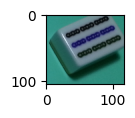

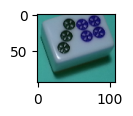

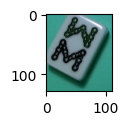

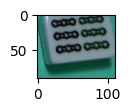

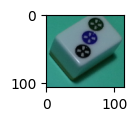

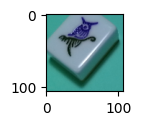

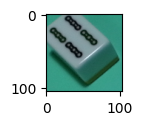

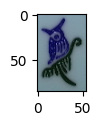

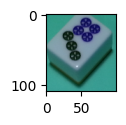

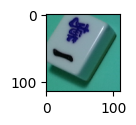

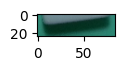

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
[ (plt.figure(figsize=(1,1)), plt.imshow(tile)) for tile in tiles ]
# plt.show()

/tmp/ipykernel_1685/2577632492.py:60: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(1,1))


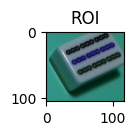

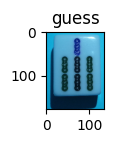

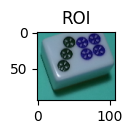

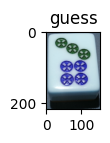

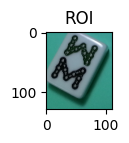

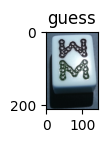

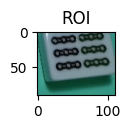

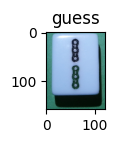

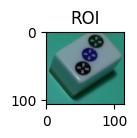

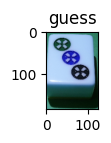

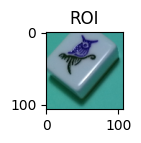

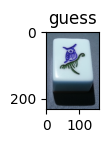

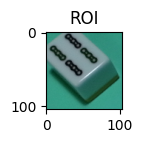

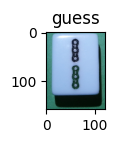

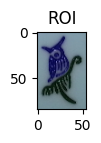

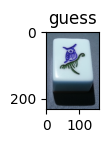

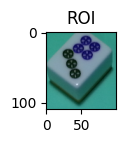

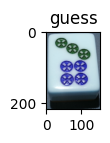

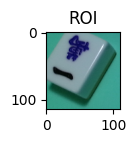

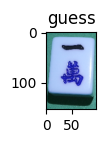

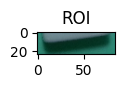

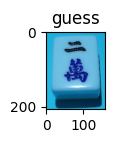

In [12]:
inliers = NN(tiles, images) # this line triggers bug

In [13]:
inliers

[(18, './data/standard/sticks-seven.jpg'),
 (15, './data/standard/circles-seven.jpg'),
 (22, './data/standard/sticks-eight.jpg'),
 (34, './data/standard/sticks-two.jpg'),
 (12, './data/standard/circles-three.jpg'),
 (10, './data/standard/sticks-one.jpg'),
 (26, './data/standard/sticks-two.jpg'),
 (9, './data/standard/sticks-one.jpg'),
 (6, './data/standard/circles-seven.jpg'),
 (12, './data/standard/wan-one.jpg'),
 (0, './data/standard/wan-two.jpg')]

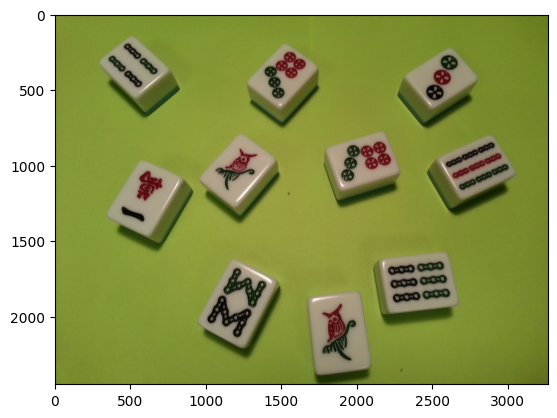

In [14]:
plt.imshow(plt.imread(FILE))

In [15]:
t1 = time.time()
print(t1 - t0)


13.148616790771484
